# Doğrusal Olmayan Regreson Modelleri

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings # Hatalari Kapatmak Icin Kullanilir
filterwarnings('ignore') # Hatalari Kapatmak Icin Kullanilir

# KNN

In [3]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [5]:
knn_model

KNeighborsRegressor()

In [6]:
knn_model.n_neighbors # Hiper Parametre Degeri ( Komsuluk Sayisi = 5'tir )

5

In [7]:
knn_model.effective_metric_

'euclidean'

## Tahmin

In [8]:
knn_model.predict(X_train) # Egitim Setine Yonelik Y Tahmin Degerleri Ureticek

array([ 102.5   ,  952.    ,  904.    ,  325.5   ,  768.6666, 1180.6666,
        118.    ,   90.5   ,  708.6666,  840.4   , 1612.1142,  160.    ,
        982.    ,  771.    ,  716.6666,  745.    ,  670.    ,   79.5   ,
        247.5   ,  303.    ,  576.    ,  996.6666,  551.    ,  451.5   ,
         81.6   ,  962.5   ,  491.    ,  425.    ,   88.6   ,  463.    ,
         70.6   ,  680.3334, 1152.3332,   78.6   ,  433.3334,  103.5   ,
        281.2   ,  799.4   ,  106.5   ,   79.5   ,   79.5   ,  553.5   ,
        198.8334,  249.    ,  336.    , 1052.    ,  205.5   ,  126.3   ,
        637.    ,  602.    ,  498.    ,  248.    ,  322.    ,  160.    ,
       1103.6666,  148.4   ,  627.    ,  707.5   ,  220.    , 1472.1142,
        803.    ,  274.2   ,  588.    ,  487.5   ,  150.5   ,  158.3   ,
         84.    ,  694.5   ,  159.5   ,  303.5   ,  336.    ,  986.6666,
        737.5   ,  904.    , 1138.6666,  778.    ,  181.5   ,  498.    ,
        417.5   ,  840.4   ,  412.5   ,  510.    , 

In [9]:
y_pred = knn_model.predict(X_test) # Test Setine Yonelik Y Tahmin Degerleri Ureticek

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Test Hatasini Gozlemliyoruz

426.6570764525201

In [11]:
# Egitim Seti Uzerinden Hata Gozlemleme Islemi Yapicaz ( Sadece Gozlemleme Islemi Yapiyoruz )

RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [12]:
# Grid : Izgara Demek ( Su Ana Kadar Kullanilabilirdi Ama Biz Kullanmadik Simdi Kullaniyoruz )
# Bir Parametre Setinin Verilip Tum Olasi Kombinasyonlarin Denenmesi Anlamina Gelir 

from sklearn.model_selection import GridSearchCV

In [13]:
# Burasi Onemli; Algoritmanin Fonksiyonunun Kabul Ettigi Parametrenin Ismi Her Nasil Ise O Sekilde Bir Isimlendirme Yapmak Gerekiyor ( Biz   "n_neighbors"   Ifadesini Koyduk )

knn_params = {'n_neighbors': np.arange(1,30,1)} # 1 Den 30'a Kadar K Degerleri Urettik ( Hangisi Daha Iyi Diye Bakicaz )

In [14]:
knn = KNeighborsRegressor() # Model Nesnesi

In [15]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10) # 1. Arguman Model Nesnem, 2. Arguman Denenecek Olan Parametreler, 3. Arguman Kac Katli CV Yapmak Istedigimizi Yaziyoruz

# ( Burada Aslinda KNN CV Nesnesini Tanimlamis Olduk Bunu Bi Fit Etmemiz Lazim )

Eger Hatalari Kapatmak Istersek ( Fonksiyonlari Kullaninca Kutuphane Ile Ilgili Bilgilendirme Mesajlari Geliyor Ya, Bu Fonksiyon Guncellenecek fln )


* from warnings import filterwarnings
* filterwarnings("ignore")

Bunlar Kullanilabilir


In [16]:
knn_cv_model.fit(X_train, y_train) # Aslinda Su Anda En Uygun Parametreyi Bulmus Oldu Bi Alt Kisimda Bunun Hangi Prametre Oldugunu Gozlemleyelim

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [17]:
knn_cv_model.best_params_["n_neighbors"]

8

In [18]:
# RMSE Degerleri: Valide Edilmemis Degerler, RMSE_CV : Valide Edilmis Degerler ( Yukaridaki Valide Edilmemis Degerlerdi ( Buna Benzer Olan Code'den Bahsediyorum ) )

# ( Su Anda Gorme Amacli Karsilastirma Yapiyoruz )

RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [19]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]) # Final Modelimiz

In [20]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [21]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test))) # Tune Edilmis KNN Modeli Ile Elde Ettigimiz Test Hatamiz 413'tur

413.7094731463598

# SVR (Destek Vektör Regresyonu)

In [22]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [23]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [24]:
from sklearn.svm import SVR

In [25]:
# SVR("linear") ---->> Tipini Belirtiyoruz

svr_model = SVR(kernel = "linear").fit(X_train, y_train)

In [26]:
svr_model.predict(X_train)[0:5] # Bunlar Bagimli Degiskenin Su An Tahmin Edilen Degerleri

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [27]:
# Dogrusal SVR'in Model Denklemi

print ("y = {0} + {1} x".format(svr_model.intercept_[0], # Sabiti Aldik
                                svr_model.coef_[0][0])) # Beta 1 Katsayisini Aldik ( Iki Tane Koseli Parantez Olmasinin Sebebi Arrayden Kurtarmak Icin ( Bilgilendirme ) )

y = -48.69756097561513 + 4.969512195122093 x


In [28]:
X_train["Hits"][0:1] # Burada Cikan Degeri Bir Ustteki Denklemde Yerine Koydugumda Tahmin Edilen ( Iki Ustteki ) 403 Degerine Erisebilecekmiyim ( Evet )

183    91.0
Name: Hits, dtype: float64

In [29]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [30]:
y_pred = svr_model.predict(X_train)

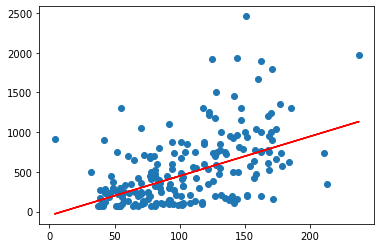

In [31]:
# Basit SVR'in Geometrik Olarak Ne Ifade Ettigini Gorelim

plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [32]:
# Dogrusal Regresyon

from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [33]:
-8.814095480334572 + 5.1724561354706875*91 # Simdi Burda Onemli Bir Mevzu Var Iki Farkli Model Ile Ayni Islemi Yaptik Fakat Sonuclar Farkli Cikti

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

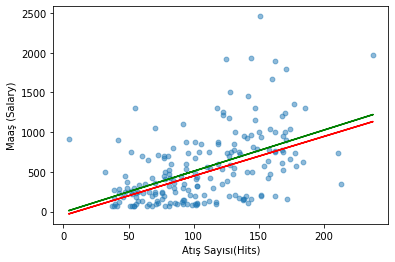

In [34]:
# Iki Farkli Modelin Grafik Uzerinde Gosterimine Bakiyoruz ( Grafikte En Ustte Bulunan Aykiri Gozlemler Linear Regression'u Yukariya Dogru Cekiyor, SVR'i Da Cekiyor Ama Daha Az Yukariya Cekiyor )
# Yani Ustte Bulunan Linear Regression, Assagida Bulunan SVR'Dir

plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Tahmin

In [35]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) # Tahmin Denklemimiz

y = -48.69756097561513 + 4.969512195122093 x


In [36]:
svr_model.predict([[91]]) # Gorulecegi Uzere Yukaridaki Gibi 403 Degerini Elde Ettik

array([403.52804878])

In [37]:
y_pred = svr_model.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Test Hatasi ( Tune Edilmemis Bir Modeldir )

459.0187960365147

In [39]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [40]:
# Burada Tune Etmemiz Gereken Parametre c ( Karmasiklik ) Parametresi ( Ayar Parametresi )  

svr_model # Model Ile Ilgili Varsayilan Ayarlar Arasinda c Diye Bir Arguman Var Ondan Bahsediyoruz

SVR(kernel='linear')

In [41]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train) # SVR Model Uzerinden Yapicak, SVR Parametrelerini Denicek, 10 Katli Olucak

In [42]:
# GridSearchCV ---->> Bu Fonksiyon Sayesinde En Iyi Parametreyi Bulup Onu Modelde Kullanabilirdik ( Tune Edilmis ) Fakat Biz Assagida Gozumuze Daha Guzel Gozukmesi Icin Yeni Model Olusturduk

In [43]:
svr_cv_model.best_params_

{'C': 0.1}

In [44]:
pd.Series(svr_cv_model.best_params_)[0] # Bize Onerdigi Parametre ( Optimum Parametre )

0.1

In [45]:
svr_tuned = SVR(kernel = "linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train) # svr_cv_model.best_params_ ------>> Bu Ifadeyi Yazmadik Pandas Serisi Halini Yazdik Ic Kismina ( Bilgilendirme )

In [46]:
y_pred = svr_tuned.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Test Hatasi ( Tek Parametreye Gore Hesaplandi Ve c Degeri 0.1 Di )

458.198966781116

In [48]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Test Hatasi ( Tum Degiskenlere Gore Degerlendirildi Ve Optimum c Degeri : 0.4 Cikti )

458.198966781116

# Doğrusal Olmayan SVR

In [49]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [50]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel = 'rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

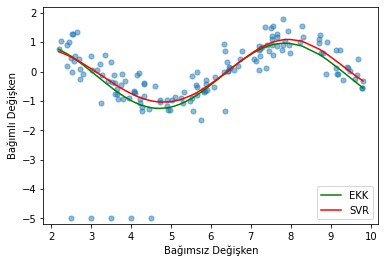

In [51]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

# Grafikte Hangisinin EKK, Hangisinin SVR Oldugu Gosterilmemis Olsa Bile Biz Anlayabiliriz ( Su Sekilde ) EKK'yi Aykiri Gozlemler Cekiyor Assagi Ve Yukariya ( Bu Sekilde Ayirt Edebiliriz )

In [52]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [53]:
svr_rbf = SVR(kernel = "rbf").fit(X_train, y_train) # Argumanlarda Tipi Belirtirken Kernel Yazmamiz Gerekiyor Kullanabilmek Icin ( Eskiye Gore Guncellenmis Fonksiyon )

## Tahmin

In [54]:
y_pred = svr_rbf.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Butun Degiskenleri Kullanarak Dogrusal Olmayan Formda Bir Model Kurduk Ve Test Hatasi 460 Olarak Gozlenmektedir

460.0032657244849

## Model Tuning

In [56]:
svr_rbf # Model Nesnemizi Cagirdik ---->> Argumanlari Arasinda c ( Karmasiklik Parametresi Var ) Yi Optimize Etmemiz Lazim

SVR()

In [57]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]} # Verilen Sayilar Az Oldugu Icin Daha Hizli Dondu
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10) # svr_rbf Icerisinden, svr_params Verdigim Parametre Icerisinden Arama Yaparak Parametre Degerlerini Bul
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [58]:
svr_cv_model.best_params_ # En Iyi Parametre Degeri

{'C': 50}

In [59]:
pd.Series(svr_cv_model.best_params_)[0] # Bu Sekilde Cikan Sayiya Ulasabiliyoruz

50

In [60]:
svr_tuned = SVR(kernel = "rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [61]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# -- Yapay Sinir Ağlari -- ( Konu Baslangici )

# Çok Katmanlı Algılayıcı

In [62]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
# Donusturme Islemi Yapiyoruz ( Cunku Yapay Sinir Aglari Bu Konuda Biraz Hassas Davranir )

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [65]:
X_train_scaled = scaler.transform(X_train) # Olceklendirilmis Olmasi Durumunu Ifade Ediyorum

In [66]:
X_test_scaled = scaler.transform(X_test)

# Su Anda Iki Degiskenimiz ( X_train_scaled,  X_test_scaled), Iki Setimiz Icin de Standartlastirma Islemi Gerceklestirmis Oldu

In [67]:
from sklearn.neural_network import MLPRegressor

In [68]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train) # Bu Sadece Gormek Icin Kullaniyoruz ( Code'nin Akisina Dahil Degil )( Ara Dipnot Gibi Dusun )

In [69]:
mlp_model.n_layers_ # Katman Sayisini Gozlemledik ----->>  # Bu Sadece Gormek Icin Kullaniyoruz ( Code'nin Akisina Dahil Degil )( Ara Dipnot Gibi Dusun ) ( Gizli Katman Ile Birlikte Burada 3 Katman Var )

3

In [70]:
mlp_model.hidden_layer_sizes # Gizli Katman Icerisindeki Eleman Sayisini Verdi bize ( Gizli Katman Sayisi Nedir? ) Modelimizde Bi Girdi Katmani Var, Bi Gizli Katman Var, Bide Cikti Katmani Var

# Bunu Dogrulayalim Isterseniz ( 2 Assagidaki Yerde Gosterdim )

(100,)

In [71]:
 # Icerisindeki Varsayilan Degerleri Ve Argumanlari Gorebiliriz

# ?mlp_model

In [72]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train) # Model Kurma Islemi Gerceklesti

In [73]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [74]:
mlp_model.n_layers_ # Katman Sayisi 4 Oldu Cunku Gizli Katman Sayisi ( 6 Yukarida ) 1'di, Simdi Ise Gizli Katman Sayisini 2 Ye Yukselttik Yani Toplam Katman Sayisi 4 Olmus Oldu

4

In [75]:
mlp_model.hidden_layer_sizes # Burada Gizli Katman Sayisinin Iki Katmandan Olustugu Gozlenmektedir ( Gizli Katmanlarinin Elemanlarini Ifade Eder ( Noron Sayilarini Ifade Eder ) )

(100, 20)

## Tahmin

In [76]:
y_pred = mlp_model.predict(X_test_scaled)

In [77]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.6546128468002

## Model Tuning

* Python'da Yapay Sinir Agi Kurmak Istedigimizde Gizli Katman Sayisini Ifade Etmenin Yolu Bu Argumana( hidden_layer_sizes ) Katmanlarin Eleman Sayisini Girmektir
* Her Bir Yeni Eleman Sayisi Ekleme Islemi Yapildiginda Bunu Katman Eklenmesi Olarak Algiler
* Yani Ornegin   hidden_layer_sizes=(100, 20)   Ifadesi 2 Katman Iken, hidden_layer_sizes=(100, 20, 10) 3 Katmanli Bir Ag Yapisi Olusturacagini Anlar Ve 3. Katmanin Eleman Sayisini Anlar Girmis Oldugum Degeri
* Yani burada 1. Katmanin 100 Norondan Olustugu, 2. Katmanin 20 Norondan Olustugu, 3. Katmanin 10 Norondan Olustugu Bilgisi Aga Verilmis Olur

In [78]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [79]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005], # Bu Birinci Girecek Oldugumuz Denenmesini Istedigimiz Parametre Seti
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],# Bi Denemesinde 20'ye 20'lik Bir Deneme Yapsin, Bi Denemesinde 100,50,150 Norona Sahip 3 Katman Kursun, Bide 300,200,150 Boyle Yap
             'activation': ['relu','logistic']} # Aktivasyon Fonksiyonu Varsayilan Olarak "relu" Var Zaten Biz Bide "logistic" Ifadesini Ekliyoruz ( Fonksiyonlarin Varsayilan Degerlerine Bakip Gorduk )

In [80]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [81]:
mlp_cv_model.fit(X_train_scaled, y_train) # ( Uzun Suren Islem )

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [82]:
mlp_cv_model.best_params_ # En Iyi Parametre Degerini gosteriyorum ( Verdigimiz Degerler Arasindan ( 3 Yukarida ) Secme Islemi Yaptik )

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [83]:
# Optimum Parametreleri Kullanarak Tune Edilmis Final Modelimizi Kuralim
# activation : default='relu'   Oldugu Icin Yazmaya Gerek Yok Fonksiyona

mlp_tuned = MLPRegressor(alpha = 0.01, hidden_layer_sizes = (100,50,150))

In [84]:
mlp_tuned.fit(X_train_scaled, y_train) # Bu Su Anda Tune Edilmis Modelimiz ( Optimum, Hiper Parametre Degerleri Ile Kurdugumuz Modelimiz )

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 50, 150))

In [85]:
# Test Hatamizi Hesapliyalim

y_pred = mlp_tuned.predict(X_test_scaled)

In [86]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Test Hatamiz 358 Cikti ( Diger Modellere Gore En Dusuk Degeri Ureten Model Bu Model Oldu ) ( En Kucuk Test Hatasini Bu Verdi )

358.7004858415965

# -- Regresyon Agaclari -- ( Konu Baslangici )

# CART ( Genellenebilirlik Kaygisi Yok Ise Kullanilir, Guzel Sonuclar Verir )

In [87]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [88]:
# Degiskenleri Seciyoruz Burda Cunku Salary Degiskenini Modellemek Icin Eksenlerdeki Durumu Gostermek Icin Secme Islemini Gerceklestirdik

X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [89]:
cart_model = DecisionTreeRegressor() # Model Kurulmus Oldu

In [90]:
# ?cart_model

In [91]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

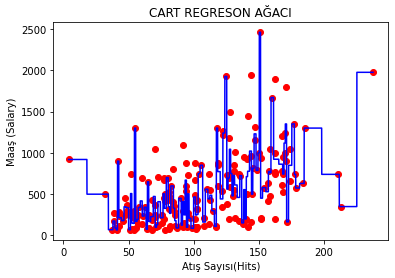

In [92]:
# Bu Modeli Eksenlerde Gorsellestirmek Istiyorum ( Dallanmalarin Kirilmalarin Arka Tarafta Nasil Gerceklestigini Gorucez )

X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) # ( Burasi Ve Bi Alt Kisim Dahil ( Assagidaki ) Aciklamaya )
X_grid = X_grid.reshape((len(X_grid), 1))  # Regresyon Kural Noktalarini Gosterebilmek Adina Bir Grid Olusturuyoruz ( Izgara ) ( Gorsel Anlamda Gorebilmek Adina )
plt.scatter(X_train, y_train, color = 'red') # Salary Ve Hits Degiskenleri Icin Scatter Plot Olusturuyoruz
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  # Tahmin Edilen Degerleri Olusturdugumuz Grid Yardimi Ile Grafige Ekleme Islemi Yapmis Oluyoruz
plt.title('CART REGRESON AĞACI')  # Isimlendirmeleri Yapiyoruz
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

# Su Anda Bir Regresyon Probleminin 2 Degisken Bazinda Nasil Oldugunu Gozlemledik

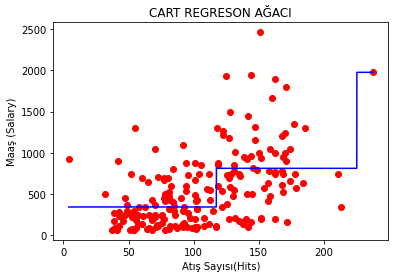

In [93]:
# Yukaridaki Ifadelerin Aynisini yapiyoruz Sadece Modelin Icerisindeki Argumani Degistiricem ( Grafig Degistigi Gozlemlenmektedir )

cart_model = DecisionTreeRegressor(max_leaf_nodes = 3) # Modelde Bi Argumani Degistiriyorum ( max_leaf_nodes = 3 Yaptik )
cart_model.fit(X_train, y_train)



X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) # ( Burasi Ve Bi Alt Kisim Dahil ( Assagidaki ) Aciklamaya )
X_grid = X_grid.reshape((len(X_grid), 1))  # Regresyon Kural Noktalarini Gosterebilmek Adina Bir Grid Olusturuyoruz ( Izgara ) ( Gorsel Anlamda Gorebilmek Adina )
plt.scatter(X_train, y_train, color = 'red') # Salary Ve Hits Degiskenleri Icin Scatter Plot Olusturuyoruz
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  # Tahmin Edilen Degerleri Olusturdugumuz Grid Yardimi Ile Grafige Ekleme Islemi Yapmis Oluyoruz
plt.title('CART REGRESON AĞACI')  # Isimlendirmeleri Yapiyoruz
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

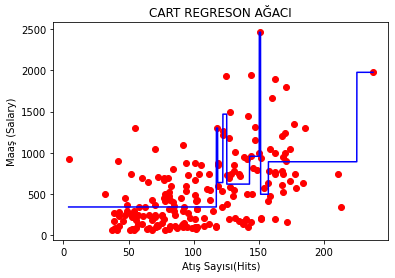

In [94]:
# Yukaridaki Ifadelerin Aynisini yapiyoruz Sadece Modelin Icerisindeki Argumani Degistiricem ( Grafig Degistigi Gozlemlenmektedir )

cart_model = DecisionTreeRegressor(max_leaf_nodes = 10) # Modelde Bi Argumani Degistiriyorum ( max_leaf_nodes = 10 Yaptik )
cart_model.fit(X_train, y_train)



X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) # ( Burasi Ve Bi Alt Kisim Dahil ( Assagidaki ) Aciklamaya )
X_grid = X_grid.reshape((len(X_grid), 1))  # Regresyon Kural Noktalarini Gosterebilmek Adina Bir Grid Olusturuyoruz ( Izgara ) ( Gorsel Anlamda Gorebilmek Adina )
plt.scatter(X_train, y_train, color = 'red') # Salary Ve Hits Degiskenleri Icin Scatter Plot Olusturuyoruz
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  # Tahmin Edilen Degerleri Olusturdugumuz Grid Yardimi Ile Grafige Ekleme Islemi Yapmis Oluyoruz
plt.title('CART REGRESON AĞACI')  # Isimlendirmeleri Yapiyoruz
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [95]:
# Eger Biz Yukaridaki Grafigi Agac Yapisi Olarak Gostermek Istersek Ne Yapmaliyiz? ( Assagida Yapiyorum ) ( Olusturmus Oldugumuz Bu Modelin Kural Setini Disariya Cikarmis Olucaz )

# !pip install skompiler

In [96]:
# from skompiler import skompile # ( Bilgilendirme ) Caslismadi !! ( Kaggle Kullandigimdan )

In [97]:
# print(skompile(cart_model.predict).to('python/code')) # Haliyle Buda Calismadi

# Fakat

# Code'nin Ciktisi Bu 


"""

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)


"""

'\n\n(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else \n    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else \n    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= \n    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= \n    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)\n\n\n'

## Tahmin

In [98]:
x = [91] # Coook Ust Tarafta Kullandigimiz Bir X Degeriydi Bu ( Ornek Olmasi Acisindan Yazdim Buraya )

In [99]:
# Codenin Ciktisinda Bir Tahmin Sonucunu Uretmis Olduk

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [100]:
# Ustteki Ifadeyi Dogrulayabilmek Adina Birde Klasik Anlamda Tahmin Islemi Yapalim

cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [101]:
cart_model.predict([[91]]) # Burada Da Gorulecegi Uzere 2 Ust Tarafta Bulunan Ifadenin Aynisini Tahmin Etti ( Cunku Ayni Islemi Yapiyoruz Aslinda )

array([345.20115517])

In [102]:
# Ilkel Test Hatamizi Da Alisik Oldugumuz Haliyle Hesapliyalim

y_pred =cart_model.predict(X_test)

In [103]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

## Model Tuning

In [104]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [105]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [106]:
# Yukaridaki Ifadenin Iyi Anlasilabilmesi Icin Bir Daha Ayni Ornekte Argumanin Degerini Degistirerek Yaziyorum

cart_model = DecisionTreeRegressor(max_leaf_nodes = 5)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)


np.sqrt(mean_squared_error(y_test, y_pred))

479.5201716052201

In [107]:
# Yukaridaki Ifadenin Iyi Anlasilabilmesi Icin Bir Daha Ayni Ornekte Argumanin Degerini Degistirerek Yaziyorum

cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)


np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [108]:
# Yukaridaki Ifadenin Iyi Anlasilabilmesi Icin Bir Daha Ayni Ornekte Argumanin Degerini Degistirerek Yaziyorum

cart_model = DecisionTreeRegressor(max_leaf_nodes = 15) # Bu Deger Degistikce Grafik Degisiyordu ( Yukaridaki Kisimda Bunu Gozlemlemistik )
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)


np.sqrt(mean_squared_error(y_test, y_pred))

455.8367349677217

In [109]:
# Yukaridaki Ifadenin Iyi Anlasilabilmesi Icin Bir Daha Ayni Ornekte Argumanin Degerini Degistirerek Yaziyorum ( Extra Bir Arguman ( Parametre ) Daha Ekliyorum )

cart_model = DecisionTreeRegressor(max_leaf_nodes = 15, min_samples_split = 10)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)


np.sqrt(mean_squared_error(y_test, y_pred))

458.44092458608196

In [110]:
# Yukaridaki Ifadenin Iyi Anlasilabilmesi Icin Bir Daha Ayni Ornekte Argumanin Degerini Degistirerek Yaziyorum

cart_model = DecisionTreeRegressor(max_leaf_nodes = 10, min_samples_split = 10) # max_leaf_nodes = 10  ---->> Bu Ifadeyi Degistirdim
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)


np.sqrt(mean_squared_error(y_test, y_pred))

450.82936090249154

In [111]:
# Yukaridaki Ifadenin Iyi Anlasilabilmesi Icin Bir Daha Ayni Ornekte Argumanin Degerini Degistirerek Yaziyorum

cart_model = DecisionTreeRegressor(max_leaf_nodes = 10, min_samples_split = 15) # min_samples_split = 15  ---->> Bu Ifadeyi Degistirdim
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)


np.sqrt(mean_squared_error(y_test, y_pred))

463.3393150254271

In [112]:
# Yukaridaki Ifadenin Iyi Anlasilabilmesi Icin Bir Daha Ayni Ornekte Argumanin Degerini Degistirerek Yaziyorum

cart_model = DecisionTreeRegressor(max_leaf_nodes = 15, min_samples_split = 2) # min_samples_split = 2  ---->> Bu Ifadeyi Degistirdim
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)


np.sqrt(mean_squared_error(y_test, y_pred))

# 455'e Dustu

455.8367349677217

In [113]:
# Yukaridaki Ifadenin Iyi Anlasilabilmesi Icin Bir Daha Ayni Ornekte Argumanin Degerini Degistirerek Yaziyorum

cart_model = DecisionTreeRegressor(min_samples_split = 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)


np.sqrt(mean_squared_error(y_test, y_pred))

# max_leaf_nodes = 15 ---->> Bu Ifadeyi Ortadan Kaldirdik Bakalim Ne Olacak

468.49579052913884

#### Bu Islemlerin Aynisini Train De Degilde Test Setine Geri Donelim ( Oyle Deneyelim )

In [114]:
# Yukaridaki Ifadenin Iyi Anlasilabilmesi Icin Bir Daha Ayni Ornekte Argumanin Degerini Degistirerek Yaziyorum

cart_model = DecisionTreeRegressor(min_samples_split = 2) # min_samples_split = 15  ---->> Bu Ifadeyi Degistirdim
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_train) # Burasi X_train Oldu


np.sqrt(mean_squared_error(y_train, y_pred)) # Burasinin Ilk Yeri y_train Oldu

# Bakin Hata 231'e Kadar Dustu

231.67017321152872

* Burada Gostermek Istedigim Sey Sudur; Bu Cart Modeli Tum Agac Yontemlerinin Temelinde Iyi Anlamamiz Gereken Model
* Ben Bu Degere ( min_samples_split = 2 ) Iki Dedigimde Model Artik Stokastik Bir Model Olmaktan Ufak Ufak Cikmaya Basladi Ve 2 Degere Kadar Karar Ureten Bir If-Else Yapisina Donusmus Oluyor

In [115]:
# Ilk Ornegimize Geri Donduruyorum ( Normal Haline ) ( Yukaridaki Yaptigim Islemleri Daha Iyi Anlayabilmek Icin Yaptim )

cart_model = DecisionTreeRegressor(min_samples_split = 2) # min_samples_split = 15  ---->> Bu Ifadeyi Degistirdim
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test) # Burasi X_train Oldu


np.sqrt(mean_squared_error(y_test, y_pred)) # Burasinin Ilk Yeri y_train Oldu

# Bakin Hata 231'e Kadar Dustu

468.49579052913884

In [116]:
# Grid Search Yondemi Ile Bu Ayarlamayi Gerceklestirmis Olucaz

cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [117]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [118]:
cart_cv_model.fit(X_train, y_train) # ( Uzun Suren Islem ) ( Bu Islemlerde ( 2 Ustte Ki Gibi ) Degerler Vermek Pek De Saglikli Degildir Fonksiyonlarin Varsayilan Degerlerini Kullanmak Lazim )

# Bilmeyen ( Yeni Ogrenen ) Kisiler Bu Sekilde Yapmasi Lazim Cunku ( 2 Ustte ) Verilen Degerler Dogrultusunda Islemler Ve Sonuclari Cok Fazla Degismektedir

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [119]:
cart_cv_model.best_params_ # En Iyi Parametreler

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [120]:
# Simdi En Iyi Parametreler Ile Tune Edilmis Modelimizi Olusturalim ( Final Modeli Kuruyoruz )

cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [121]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [122]:
# Test Hatasina Bakalim

y_pred = cart_tuned.predict(X_test)

In [123]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Bu Elde Ettigimiz Deger Tek Degisken Uzerinden Elde Ettigimiz Degerdi

423.406689243066

### Modeli Butun Degiskenleri Ile ( Butun Parametreler Ile ) Bir Daha Calistiriyoruz Test Hatasini Gormek Icin

In [124]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [125]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred)) # Ilkel Hatamizi Gozlemliyoruz ( Artmis Oldugunuz Goruyoruz )

528.4921687244818

In [126]:
# Parametre Setlerini Bir Daha Calistiriyoruz

cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [127]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [128]:
cart_cv_model.fit(X_train, y_train) # ( Uzun Suren Islem ) ( Bu Islemlerde ( 2 Ustte Ki Gibi ) Degerler Vermek Pek De Saglikli Degildir Fonksiyonlarin Varsayilan Degerlerini Kullanmak Lazim )

# Bilmeyen ( Yeni Ogrenen ) Kisiler Bu Sekilde Yapmasi Lazim Cunku ( 2 Ustte ) Verilen Degerler Dogrultusunda Islemler Ve Sonuclari Cok Fazla Degismektedir

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [129]:
cart_cv_model.best_params_ # En Iyi Parametreleri Gozlemledik

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [130]:
# Simdi En Iyi Parametreler Ile Tune Edilmis Modelimizi Olusturalim ( Final Modeli Kuruyoruz )

cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [131]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [132]:
# Test Hatasina Bakalim

y_pred = cart_tuned.predict(X_test)

In [133]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Deger 376'lara Kadar Dusmus Oldu ( Tum Degiskenleri Kullanip Tune Etme Islemleri Sonrasinda Yapay Sinir Aglarinin Hatalarina Kadar Bu Hata Degeri Dustu )

# Tum Degiskenleri Kullanip Test Hatamizi Biraz Daha Assagiya Cekmis Olduk

376.39788207109865